# Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset

# Import all Python Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("datasets/ass5/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [35]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [36]:
df = pd.get_dummies(df,columns = ['Gender'])

In [37]:
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,False,True
1,15810944,35,20000,0,False,True
2,15668575,26,43000,0,True,False
3,15603246,27,57000,0,True,False
4,15804002,19,76000,0,False,True
...,...,...,...,...,...,...
395,15691863,46,41000,1,True,False
396,15706071,51,23000,1,False,True
397,15654296,50,20000,1,True,False
398,15755018,36,33000,0,False,True


In [38]:
df.drop(columns = ['Gender_Male','User ID'],inplace = True)

In [39]:
df

,Age,EstimatedSalary,Purchased,Gender_Female
0,19,19000,0,False
1,35,20000,0,False
2,26,43000,0,True
3,27,57000,0,True
4,19,76000,0,False
...,...,...,...,...
395,46,41000,1,True
396,51,23000,1,False
397,50,20000,1,True
398,36,33000,0,False


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledSalary = scaler.fit_transform(df[['EstimatedSalary']])
df['EstimatedSalary'] = scaledSalary

In [41]:
x = df.drop(columns = ['Purchased'])
y = df['Purchased']


In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 22,train_size = 0.8)

In [43]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 3) (80, 3) (320,) (80,)


In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, y_pred))
print(1 - accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8875
0.11250000000000004
0.8846153846153846
0.7931034482758621


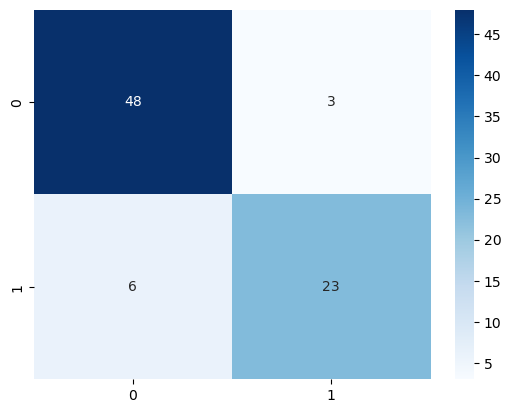

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.show()